In [1]:
import os
import re
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def gather_dicts():
    """Gathers json files into a master dictionary
    for analysis.
    """
    _dir = 'data/'
    
    # instantiate master dict
    _dict = {}
    for i in os.listdir(_dir):
        
        # only read in json files
        pattern = r'\w+\d+\.json$'
        m = re.search(pattern, i)
        
        if m is not None:
            
            filename = m.group(0)   
            filepath = os.path.join(_dir, filename)
            with open(filepath) as f:
                _json = json.load(f)
            
            # get name for naming each dict
            name = filename.split('.')[0]        
            _dict[name] = _json
        else:
            continue
        
    return(_dict)

In [3]:
# get master dict
_dict = gather_dicts()

# convert to a master df
df = pd.DataFrame.from_dict(_dict)

# the master df is a series of dicts
df

,newformat1,newformat2,test1,test2,test3,test4,test5,test6,test7
computer,HP ProBook 450 G5,HP ProBook 4530s,NaN,NaN,NaN,NaN,NaN,NaN,HP ProBook 450 G5
data,"{'time': ['21:23:19', '21:24:11'], 'download':...","{'time': ['21:37:33'], 'download': [42.265824]...","{'time': ['12:03:59', '12:07:13', '12:11:15', ...","{'time': ['12:46:26', '12:50:20', '12:52:20', ...","{'time': ['13:31:28', '13:35:30', '13:38:15', ...","{'time': ['14:09:46', '14:11:36', '14:16:51', ...","{'time': ['16:26:02', '16:28:46', '16:32:11', ...","{'time': ['18:19:50', '18:24:21', '18:28:50', ...","{'time': ['10:29:54', '10:32:24', '10:33:27', ..."
day,2020-06-09,2020-06-09,2020-06-07,2020-06-07,2020-06-07,2020-06-07,2020-06-08,2020-06-09,2020-06-10
location,upper west,upper west,living room,upper east,lower west,upper west,upper east,upper west,upper west


In [5]:
newHP = df['newformat1']['computer']

In [7]:
df['test1']['computer'] = newHP

In [14]:
df['test5']['computer'] = df['test6']['computer'] = newHP

In [15]:
df

,newformat1,newformat2,test1,test2,test3,test4,test5,test6,test7
computer,HP ProBook 450 G5,HP ProBook 4530s,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 450 G5
data,"{'time': ['21:23:19', '21:24:11'], 'download':...","{'time': ['21:37:33'], 'download': [42.265824]...","{'time': ['12:03:59', '12:07:13', '12:11:15', ...","{'time': ['12:46:26', '12:50:20', '12:52:20', ...","{'time': ['13:31:28', '13:35:30', '13:38:15', ...","{'time': ['14:09:46', '14:11:36', '14:16:51', ...","{'time': ['16:26:02', '16:28:46', '16:32:11', ...","{'time': ['18:19:50', '18:24:21', '18:28:50', ...","{'time': ['10:29:54', '10:32:24', '10:33:27', ..."
day,2020-06-09,2020-06-09,2020-06-07,2020-06-07,2020-06-07,2020-06-07,2020-06-08,2020-06-09,2020-06-10
location,upper west,upper west,living room,upper east,lower west,upper west,upper east,upper west,upper west


In [4]:
# each test can be converted to a df
test01 = pd.DataFrame.from_dict(df['test01']['data'])
test01

,time,download,upload
0,12:03:59,99.751580,4.588742
1,12:07:13,69.165935,5.515696
2,12:11:15,82.097260,3.592372
3,12:15:19,76.162253,6.511090
4,12:19:53,49.996191,4.993106
5,12:24:15,80.555113,5.375524
6,12:25:55,132.313207,4.940173
7,12:27:09,118.668693,5.650967
8,12:29:03,97.323495,5.672564
9,12:34:15,88.024754,6.971582


In [5]:
def plot(df, col):
    """Plots speeds, given a test.
    """

    plt.rcParams['figure.figsize'] = [10, 5]
    plt.ylim(0, 140)
    
    title = ', '.join([df[col]['location'],
                       df[col]['day']])
    
    xlab = df[col]['data']['time']
    Y1 = df[col]['data']['download']
    Y2 = df[col]['data']['upload']

    mn = np.mean(Y1)
    plt.axhline(y=mn, color='r'
                , linestyle='--'
                , linewidth=1
                , label='avg download speed'
               )
    
    plt.xticks(range(10), xlab, rotation='vertical')
    plt.plot(Y1, label='download')
    plt.plot(Y2, label='upload')
    plt.title(title)
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
    
    plt.ylabel('Mbps')
    plt.show()

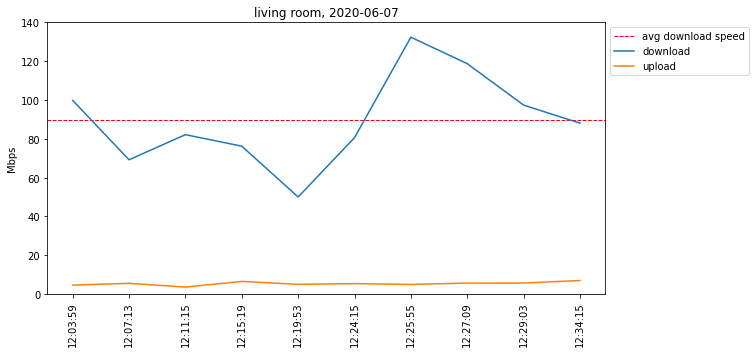

In [6]:
plot(df, 'test01')

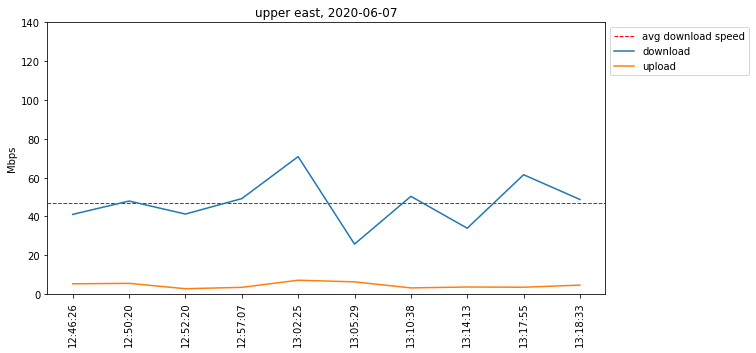

In [7]:
plot(df, 'test02')

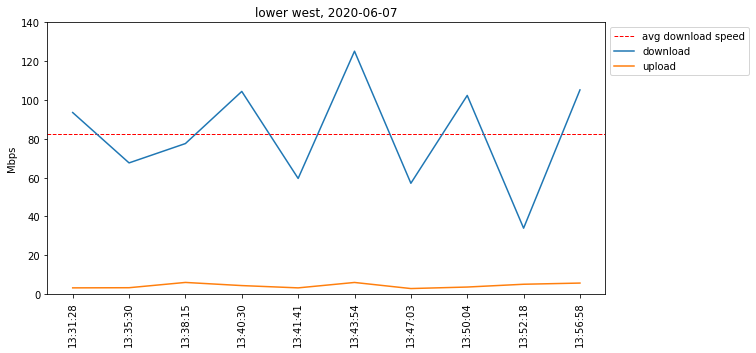

In [8]:
plot(df, 'test03')

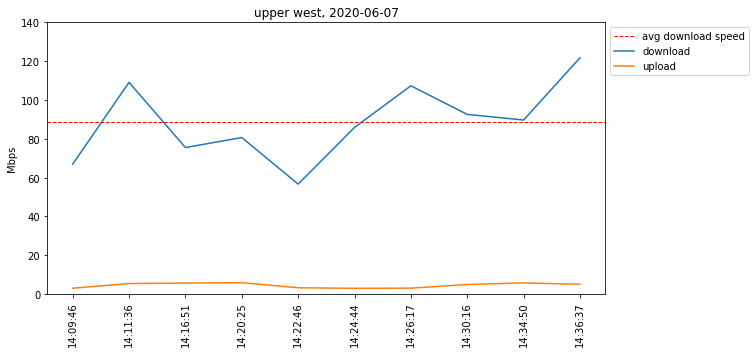

In [9]:
plot(df, 'test04')